In [ ]:
#create a model to predict breast cancer. Also, what traits are most indicative of whether 
#or not an individual will be diagnosed?

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns #to visualization
from sklearn import preprocessing
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
import warnings

In [58]:
df_bc = pd.read_csv('breast-cancer-wisconsin.data.csv')

In [59]:
df_bc.head()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [60]:
#use shape to determine if any of the missing columns contains rows equal to the total rows of the datafram
#if yes, then you can drop the column. 
#if no, you need to look at other data cleaning options

df_bc.shape

(699, 11)

In [61]:
#shows only the columns with missing values
missing_val_count_by_column = (df_bc.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Series([], dtype: int64)


In [67]:
#Verify data types of columns before we apply a cleaning function.
#Let's focus on the columsn defined as object types. If they contain categorical information or 
#made of just strings we can provide a default text to allevate the NaN values.
df_bc.dtypes

Sample_code_number              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [63]:
#verify the data in the column define as objects. We need to understand what string values it holds and
#how it can be converted to an integer.
df_bc['Bare_Nuclei'].value_counts(dropna=False)

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare_Nuclei, dtype: int64

In [64]:
#initially the dataset contain ? for 16 rows and numeric data for all of the other rows. 
#As a result the column had the data type of Object. Therefore, we have to clean this up first by changing the
#data type to numeric and setting errors = to coerce. If ‘coerce’, then invalid parsing will be set as NaN
df_bc['Bare_Nuclei'] = pd.to_numeric(df_bc['Bare_Nuclei'],errors='coerce')

In [68]:
#now the ? has been converted to NAN and we can replace NaN with 0.0
df_bc['Bare_Nuclei'].fillna(value='0.0', inplace=True, downcast='infer')

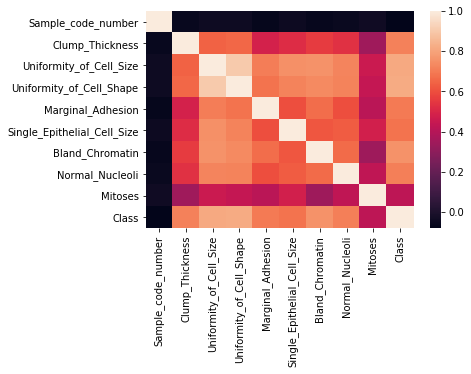

In [69]:
#show a heatmap of predictor variables to determine how much correlation you have between your variables
sns.heatmap(df_bc.corr())

In [70]:
df_bc.columns

Index(['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [93]:
#let's define our X predictor variable and Y outcome variable 
X = df_bc[['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses']]
#2 for benign, 4 for malignant
y = df_bc[['Class']]

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/karenmcge

AttributeError: 'NoneType' object has no attribute 'update'

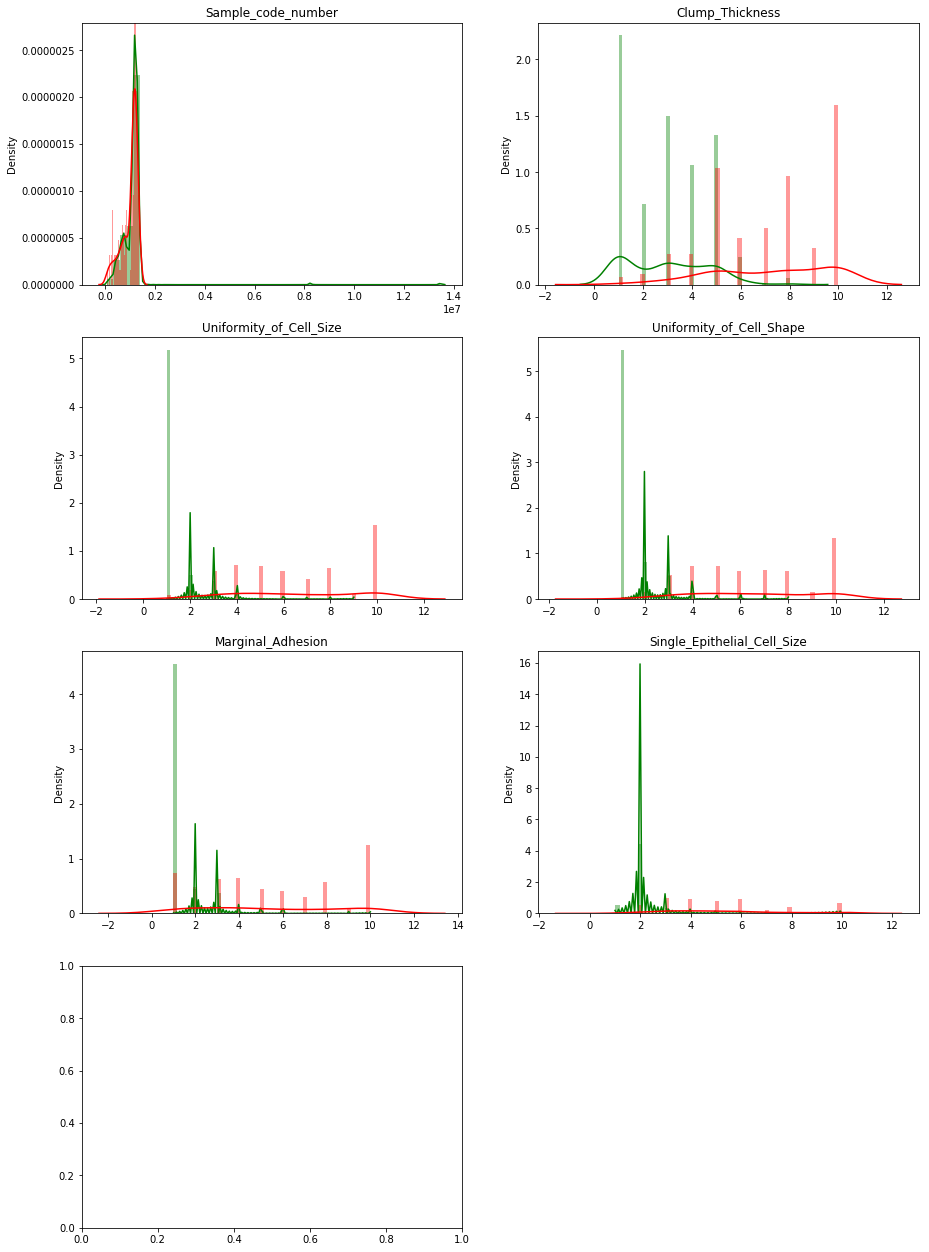

In [82]:
#Look at the data of predictor variables and determine if it is normalized. If it isn't run a 
#scalar function to normalize the data.
columns = df_bc.iloc[:,0:9].columns

benign = df_bc.Class == 2
malignant = df_bc.Class == 4

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df_bc[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df_bc[col][benign], bins = 50, color='g') #Will receive the "semi-salmon" violin
    sns.distplot(df_bc[col][malignant], bins = 50, color='r') #Will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

In [94]:
#based on the plots above the data is not normalized and therefore I need to run it through a standard scalar 
#function
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(X)
scaled_df = pd.DataFrame(scaled_df, columns=['Sample_code_number', 'Clump_Thickness', 'Uniformity_of_Cell_Size',
       'Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses'])
scaled_df

/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,-0.116239,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.677144,-0.179662,-0.611825,-0.343912
1,-0.111504,0.206936,0.283845,0.266875,0.768621,1.710106,1.796673,-0.179662,-0.284112,-0.343912
2,-0.091265,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.402275,-0.179662,-0.611825,-0.343912
3,-0.089884,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.147462,-0.179662,1.354454,-0.343912
4,-0.088674,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.677144,-0.179662,-0.611825,-0.343912
5,-0.088513,1.273138,2.251526,2.287222,1.820022,1.710106,1.796673,2.282766,1.354454,-0.343912
6,-0.086929,-1.214667,-0.699995,-0.743299,-0.633247,-0.549561,1.796673,-0.179662,-0.611825,-0.343912
7,-0.086180,-0.859266,-0.699995,-0.406574,-0.633247,-0.549561,-0.677144,-0.179662,-0.611825,-0.343912
8,-0.062638,-0.859266,-0.699995,-0.743299,-0.633247,-0.549561,-0.677144,-1.000471,-0.611825,1.990014
9,-0.062638,-0.148465,-0.372048,-0.743299,-0.633247,-0.549561,-0.677144,-0.590067,-0.611825,-0.343912


In [95]:
#assigned the scaled data to X before running the data in the model
X = scaled_df

In [108]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(knn, X, y, cv=5)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

#fit the model with data
knn.fit(X,y.values.ravel())

y_pred = knn.predict(X)

#find the accuracy where KNN = 1 nearest neighbor
from sklearn.metrics import accuracy_score
print("The overall prediction accuracy score using KNN is: ", accuracy_score(y, y_pred))



 Percentage accuracy of X and Y cross validation results are :  [0.89361702 0.94285714 0.95714286 0.98561151 0.94964029]
The overall prediction accuracy score using KNN is:  1.0


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_validat

In [103]:
#Use a SVN classification model and compare if the results from knn and naive bayes see which 
#performs the best

from sklearn.svm import LinearSVC

#increasing the C parameter can improve the accuracy. I initally started with 7 and achieved 96% accuracy
#increased the parameter C to 14 with a 65% accurracy
#increased it to 7 with a 87% accurracy, notice the accuracy didn't improve much from the C parameters of 1 and 5

svc = LinearSVC(C=14)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(svc, X, y.values.ravel(), cv=5)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

svc.fit(X, y.values.ravel())

#score = cross_val_score(regressor, X_test, y_test)
score = svc.score(X, y.values.ravel())

print("The overal prediction accuracy score using SVM is: ",score) 


 Percentage accuracy of X and Y cross validation results are :  [0.93617021 0.93571429 0.98571429 0.98561151 0.98561151]
The overal prediction accuracy score using SVM is:  0.9699570815450643


/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/karenmcgee/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, i

In [98]:
#Use a decision tree classification model and compare if the results from knn and naive bayes see which 
#performs the best

from sklearn.tree import DecisionTreeClassifier

#increasing the max_depth is improving the accuracy. I initally started with 1 with a 88% accuracy
#increased 5 with a 88% accurracy
#increased it to 7 with a 88% accurracy, notice the accuracy didn't improve much from the max_depth of 5
clf = DecisionTreeClassifier(max_depth=5)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(clf, X, y, cv=7)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

clf.fit(X, y)

#score = cross_val_score(regressor, X_test, y_test)
score = clf.score(X, y)

print("The overal prediction accuracy score using decision tree classifier is: ",score) 


 Percentage accuracy of X and Y cross validation results are :  [0.89108911 0.95049505 0.9009901  0.93939394 0.96969697 0.97979798
 0.95959596]
The overal prediction accuracy score using decision tree classifier is:  0.9756795422031473


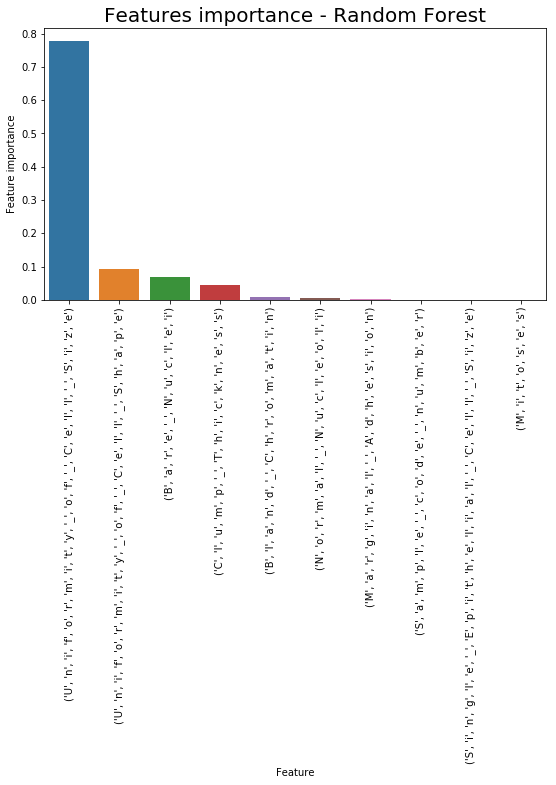

In [105]:
#Let's review the list of important features that Random forest selected.
features = X

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': clf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

In [ ]:
#Overall my accurracy is averaging 97% with all of my models. Initiall when I ran the data through the models
# before performing standard scaling my results were less than 65 percent. I performed more research and 
#using the errors I realized my data wasn't normalized which impacted my overall accuracy. 
# I quickly scaled the data and improved my accuracy.